Appliance Energy Prediction

The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions
were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the
temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for
10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters.
Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded
from a public data set from Reliable Prognosis (rp5.ru) and merged together with the
experimental data sets using the date and time column. Two random variables have been
included in the data set for testing the regression models and to filter out non-predictive attributes
(parameters).

In [2]:
#loading the required libraries
import numpy as np 
import pandas as pd 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
#code to ignore warrnings dispayed
import warnings
warnings.filterwarnings('ignore')

In [4]:
#loading the dataset
df = pd.read_csv("data_application_energy.csv")

In [5]:
#to display first three rows in out dataset
df.head(3)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668


In [6]:
#to display last three rows in our dataset
df.tail(3)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
19732,2016-05-27 17:40:00,270,10,25.5,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,...,23.2,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.5,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,...,23.2,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784
19734,2016-05-27 18:00:00,430,10,25.5,46.600000,25.264286,42.971429,26.823333,41.156667,24.7,...,23.2,46.8450,22.200000,755.2,57.000000,4.000000,27.000000,13.200000,34.118851,34.118851


In [7]:
#checking the  shape of our dataset
df.shape

(19735, 29)

Number of rows present in our dataset-19735<br>
Number of columns present in our dataset-29

In [8]:
#to print information about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [9]:
#checking for null values present in our datset
df.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

There are no null values present in our data.

In [10]:
#Checking the statistical discription of our dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Appliances,19735.0,97.694958,102.524891,10.000000,50.000000,60.000000,100.000000,1080.000000
lights,19735.0,3.801875,7.935988,0.000000,0.000000,0.000000,0.000000,70.000000
T1,19735.0,21.686571,1.606066,16.790000,20.760000,21.600000,22.600000,26.260000
RH_1,19735.0,40.259739,3.979299,27.023333,37.333333,39.656667,43.066667,63.360000
T2,19735.0,20.341219,2.192974,16.100000,18.790000,20.000000,21.500000,29.856667
RH_2,19735.0,40.420420,4.069813,20.463333,37.900000,40.500000,43.260000,56.026667
T3,19735.0,22.267611,2.006111,17.200000,20.790000,22.100000,23.290000,29.236000
RH_3,19735.0,39.242500,3.254576,28.766667,36.900000,38.530000,41.760000,50.163333
T4,19735.0,20.855335,2.042884,15.100000,19.530000,20.666667,22.100000,26.200000
RH_4,19735.0,39.026904,4.341321,27.660000,35.530000,38.400000,42.156667,51.090000


We observe most of the values are 0 in light column.

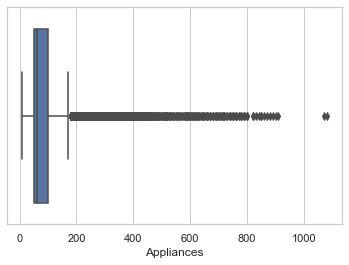

In [11]:
#to plot a boxplot for our target variable appliance
sns.set(style="whitegrid")
ax = sns.boxplot(df.Appliances)

because 75% of the Appliance consumption is less than 100 Wh . With the maximum consumption of 1080 Wh , there will be outliers in this column and there are small number of cases where consumption is very high

In [12]:
#dropping outliers in appliance column
df = df.dropna()
df = df.drop(df[(df.Appliances>600)|(df.Appliances<0)].index)

In [13]:
#shape of dataset after reomoving outliers
df.shape

(17819, 29)

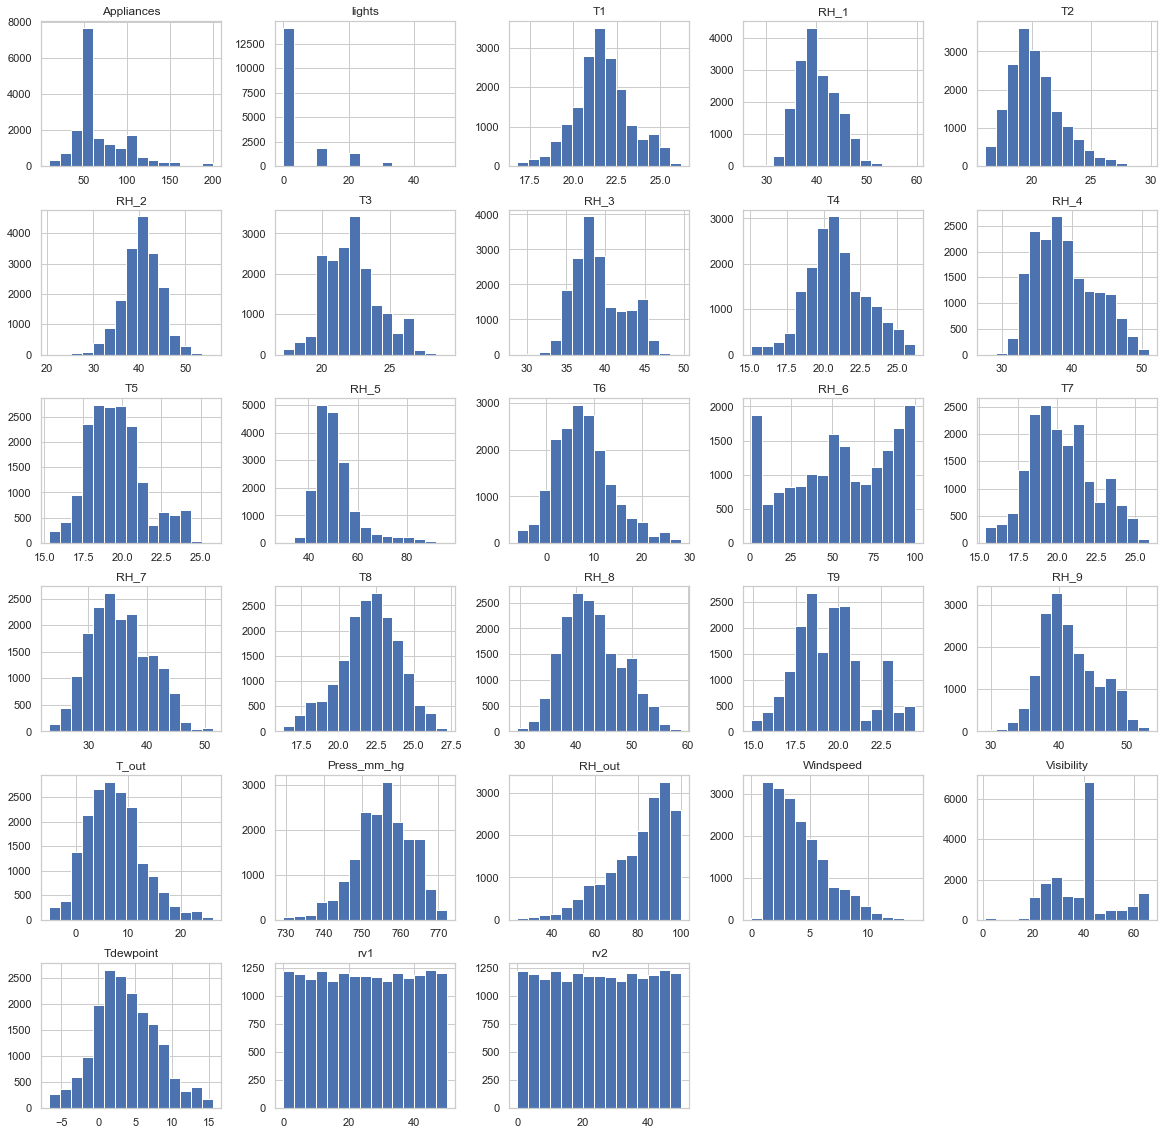

In [14]:
#to get an intuitive sense of the distribution of values within variable.
df.hist(bins=15, figsize=(20,20))
plt.show()

In [15]:
#Number of unique values present in a column
df.nunique()

date           17819
Appliances        20
lights             6
T1               649
RH_1            2285
T2              1512
RH_2            3078
T3              1163
RH_3            2235
T4              1275
RH_4            2741
T5              2094
RH_5            6982
T6              4124
RH_6            9103
T7              1837
RH_7            5439
T8              2098
RH_8            6116
T9               863
RH_9            3181
T_out           1702
Press_mm_hg     2131
RH_out           561
Windspeed        186
Visibility       411
Tdewpoint       1394
rv1            17819
rv2            17819
dtype: int64

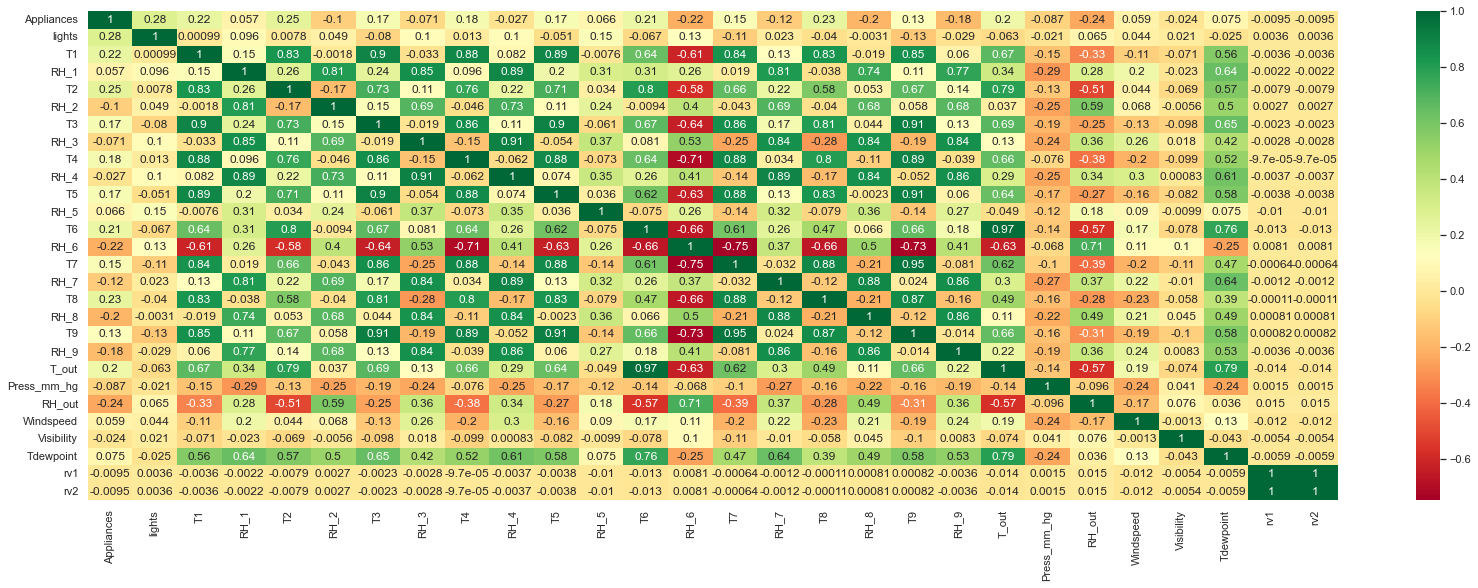

In [16]:
corrmap = df.corr()
top_corr_features = corrmap.index
plt.figure(figsize=(28,9))
#making of heatmap
df_heatmap = sns.heatmap(df[top_corr_features].corr(), annot=True, cmap="RdYlGn")

*The Temperature and humidity levels in each of the rooms are highly correlated among themselves.<br>
*seems to be no relationship between humidity and temperature levels in the building.<br>
*little to no correlation between these features and the target variable Appliance can be seen<br>
*temperature and humidity levels outside the building are hugely negatively correlated.

most of the values in lights columns are zero also this column does not add much value with little corelation so its better to drop the lights column.

In [17]:
#dropping the column lights
df.drop('lights',inplace = True, axis = 1)

Given this is not a timeseries problem and we will focus on regression, predicting the appliance consumption , we can ignore Date column.

In [18]:
#dropping the column date
df.drop('date',inplace = True, axis = 1)

In [19]:
#to display our dataframe
df

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,...,17.033333,45.530000,6.600000,733.50,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,60,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,...,17.066667,45.560000,6.483333,733.60,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,50,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,...,17.000000,45.500000,6.366667,733.70,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,50,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,...,17.000000,45.400000,6.250000,733.80,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,60,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,...,17.000000,45.400000,6.133333,733.90,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19727,120,25.500000,47.456667,26.000000,42.320000,27.663333,40.693333,24.700000,45.560000,23.200000,...,23.200000,46.718000,22.966667,755.25,55.000000,2.833333,22.166667,13.366667,1.796395,1.796395
19728,110,25.600000,47.193333,25.968571,42.528571,27.390000,41.030000,24.700000,45.626667,23.200000,...,23.200000,46.751429,23.000000,755.20,55.000000,3.000000,22.000000,13.400000,18.248201,18.248201
19729,90,25.533333,46.860000,25.978000,42.534000,27.323333,41.090000,24.700000,45.626667,23.200000,...,23.200000,46.745000,22.866667,755.20,55.333333,3.166667,22.833333,13.366667,16.966162,16.966162
19730,100,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,23.200000,...,23.200000,46.790000,22.733333,755.20,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812


In [20]:
#importing standardscaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [21]:
#using standardscaler to standardize the data values into a standard format.
df_1 = pd.DataFrame(columns=df.columns , index=df.index)
df_1[df_1.columns] = sc.fit_transform(df)

In [22]:
#to display our dataset after the application of standardscaler
df_1

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,-0.278174,-1.119903,1.890961,-0.504020,1.063275,-1.237878,1.725709,-0.907510,1.520484,-1.327659,...,-1.227336,0.954191,-0.135278,-3.003386,0.796388,1.235624,2.066113,0.367381,-0.807715,-0.807715
1,-0.278174,-1.119903,1.661317,-0.504020,1.046657,-1.237878,1.744323,-0.907510,1.618949,-1.327659,...,-1.210765,0.961395,-0.157331,-2.989771,0.796388,1.099466,1.745376,0.343492,-0.440561,-0.440561
2,-0.596876,-1.119903,1.561325,-0.504020,1.023065,-1.237878,1.788790,-0.943317,1.595248,-1.327659,...,-1.243906,0.946988,-0.179383,-2.976156,0.796388,0.963309,1.424638,0.319603,0.250697,0.250697
3,-0.596876,-1.119903,1.502007,-0.504020,1.014038,-1.237878,1.809472,-0.961221,1.556709,-1.327659,...,-1.243906,0.922976,-0.201436,-2.962541,0.796388,0.827151,1.103901,0.295715,1.405567,1.405567
4,-0.278174,-1.119903,1.569799,-0.504020,0.999267,-1.237878,1.809472,-0.961221,1.512005,-1.309529,...,-1.243906,0.922976,-0.223488,-2.948926,0.796388,0.690994,0.783163,0.271826,-1.027517,-1.027517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19727,1.634039,2.374974,1.855370,2.626196,0.455202,2.756398,0.473398,1.875699,1.518942,1.953817,...,1.838192,1.239450,2.958391,-0.042122,-1.708555,-0.466345,-1.350439,2.294411,-1.598329,-1.598329
19728,1.315337,2.437271,1.788426,2.611729,0.506549,2.617731,0.577844,1.875699,1.534357,1.953817,...,1.838192,1.247476,2.964692,-0.048930,-1.708555,-0.398267,-1.364384,2.302374,-0.465218,-0.465218
19729,0.677933,2.395740,1.703687,2.616069,0.507885,2.583910,0.596458,1.875699,1.534357,1.953817,...,1.838192,1.245933,2.939489,-0.048930,-1.685988,-0.330188,-1.294659,2.294411,-0.553518,-0.553518
19730,0.996635,2.416506,1.627422,2.575560,0.382754,2.521341,0.619208,1.875699,1.525879,1.953817,...,1.838192,1.256738,2.914286,-0.048930,-1.663420,-0.262109,-1.224933,2.286449,1.246220,1.246220


In [23]:
df = df_1

In [24]:
df

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,-0.278174,-1.119903,1.890961,-0.504020,1.063275,-1.237878,1.725709,-0.907510,1.520484,-1.327659,...,-1.227336,0.954191,-0.135278,-3.003386,0.796388,1.235624,2.066113,0.367381,-0.807715,-0.807715
1,-0.278174,-1.119903,1.661317,-0.504020,1.046657,-1.237878,1.744323,-0.907510,1.618949,-1.327659,...,-1.210765,0.961395,-0.157331,-2.989771,0.796388,1.099466,1.745376,0.343492,-0.440561,-0.440561
2,-0.596876,-1.119903,1.561325,-0.504020,1.023065,-1.237878,1.788790,-0.943317,1.595248,-1.327659,...,-1.243906,0.946988,-0.179383,-2.976156,0.796388,0.963309,1.424638,0.319603,0.250697,0.250697
3,-0.596876,-1.119903,1.502007,-0.504020,1.014038,-1.237878,1.809472,-0.961221,1.556709,-1.327659,...,-1.243906,0.922976,-0.201436,-2.962541,0.796388,0.827151,1.103901,0.295715,1.405567,1.405567
4,-0.278174,-1.119903,1.569799,-0.504020,0.999267,-1.237878,1.809472,-0.961221,1.512005,-1.309529,...,-1.243906,0.922976,-0.223488,-2.948926,0.796388,0.690994,0.783163,0.271826,-1.027517,-1.027517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19727,1.634039,2.374974,1.855370,2.626196,0.455202,2.756398,0.473398,1.875699,1.518942,1.953817,...,1.838192,1.239450,2.958391,-0.042122,-1.708555,-0.466345,-1.350439,2.294411,-1.598329,-1.598329
19728,1.315337,2.437271,1.788426,2.611729,0.506549,2.617731,0.577844,1.875699,1.534357,1.953817,...,1.838192,1.247476,2.964692,-0.048930,-1.708555,-0.398267,-1.364384,2.302374,-0.465218,-0.465218
19729,0.677933,2.395740,1.703687,2.616069,0.507885,2.583910,0.596458,1.875699,1.534357,1.953817,...,1.838192,1.245933,2.939489,-0.048930,-1.685988,-0.330188,-1.294659,2.294411,-0.553518,-0.553518
19730,0.996635,2.416506,1.627422,2.575560,0.382754,2.521341,0.619208,1.875699,1.525879,1.953817,...,1.838192,1.256738,2.914286,-0.048930,-1.663420,-0.262109,-1.224933,2.286449,1.246220,1.246220


In [25]:
#temperature columns
temperature_df = ["T1","T2","T3","T4","T5","T6","T7","T8","T9"]

#humidity sensor columns
humidity_df = ["RH_1","RH_2","RH_3","RH_4","RH_5","RH_6","RH_7","RH_8","RH_9"]

#weather data
weather_df = ["T_out", "Tdewpoint","RH_out","Press_mm_hg",
                "Windspeed","Visibility"] 

randoms = ["rv1", "rv2"]

target = ["Appliances"]


In [26]:
#assigning all features in train and appliance column to test
train = df[temperature_df+humidity_df+weather_df+randoms]

test =  df[target]

In [27]:
#import train test split
from sklearn.model_selection import train_test_split
#splitting the train into x_train,y_train and test into x_test,y_test in 75 and 25%.
X_train, X_test, Y_train, Y_test = train_test_split(train, test,test_size=0.25,random_state=7)

In [28]:
train.shape

(17819, 26)

In [29]:
test.shape

(17819, 1)

In [30]:
X_train.shape

(13364, 26)

In [31]:
X_train.head()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,RH_1,...,RH_8,RH_9,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed,Visibility,rv1,rv2
994,-1.431390,-0.922917,-1.283537,-0.961221,-1.091973,-1.156506,-0.607774,-1.208110,-1.144483,0.306335,...,-0.124299,-0.877895,-1.471037,-2.260388,-0.828440,0.209755,-0.398267,-0.471897,-1.260011,-1.260011
19457,1.701031,1.512835,1.331452,1.635553,0.964429,1.803386,1.472368,1.235920,1.291368,-0.685269,...,-0.416836,-0.778938,1.685640,0.900898,-1.595719,0.073605,-1.147133,-0.011708,-0.633123,-0.633123
10006,-0.116917,-0.860006,-0.015244,-0.565712,-0.172797,-0.596789,-0.484090,0.429657,0.048587,-0.701215,...,0.301778,-0.183960,-0.500722,0.096641,1.089759,0.736202,-1.215212,1.034175,1.311720,1.311720
7597,-0.808417,-0.625020,-0.877683,-0.858682,-0.874416,-0.630568,-0.897956,-0.910103,-0.588427,-0.659451,...,-0.552296,-0.601419,-0.557878,-0.120064,0.828626,-2.200425,-0.164854,0.601877,-0.614775,-0.614775
9212,-0.185444,-0.002265,-0.730561,0.117883,-0.004191,0.624235,0.882778,0.467014,0.098298,-1.533355,...,-1.977034,-0.925919,0.494797,0.017012,-0.941275,1.112884,0.827151,0.866834,0.112973,0.112973


In [32]:
Y_train.shape

(13364, 1)

In [33]:
Y_train.head()

,Appliances
994,-0.915578
19457,1.315337
10006,-0.596876
7597,-0.278174
9212,1.952741


In [34]:
Y_test.shape

(4455, 1)

In [35]:
#importing ml regressors
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor

In [36]:
models = [ ['Ridge: ', Ridge()],
           ['SVR:' , SVR(kernel='rbf')],
           ['KNeighborsRegressor: ', KNeighborsRegressor()],
           ['RandomForest ',RandomForestRegressor()],
           ['GradientBoostingClassifier: ', GradientBoostingRegressor()] ,
           ['ExtraTreeRegressor :',ExtraTreesRegressor()],
         ]

In [37]:
# Run all the proposed models and update the information in a list model_data
import time
from math import sqrt
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 7
    curr_model_data["Name"] = name
    start = time.time()
    curr_model.fit(X_train,Y_train)
    end = time.time()
    curr_model_data["Train_Time"] = end - start
    curr_model_data["Train_R2_Score"] = metrics.r2_score(Y_train,curr_model.predict(X_train))
    curr_model_data["Test_R2_Score"] = metrics.r2_score(Y_test,curr_model.predict(X_test))
    curr_model_data["Test_RMSE_Score"] = sqrt(mean_squared_error(Y_test,curr_model.predict(X_test)))
    model_data.append(curr_model_data)


In [38]:
model_df = pd.DataFrame(model_data)

In [39]:
model_df

,Name,Train_Time,Train_R2_Score,Test_R2_Score,Test_RMSE_Score
0,Ridge:,0.088808,0.287536,0.276792,0.859426
1,SVR:,24.033641,0.490487,0.452114,0.748035
2,KNeighborsRegressor:,0.016843,0.678821,0.490298,0.721498
3,RandomForest,56.034619,0.949248,0.638888,0.607292
4,GradientBoostingClassifier:,16.310020,0.441876,0.379700,0.795935
5,ExtraTreeRegressor :,18.142382,1.000000,0.644156,0.602846


Out of all the models Extra Tree Regressor seems to be performing best with test r2 score of 0.64 and test rmse score of 0.60

<AxesSubplot:title={'center':'R2 Score Results'}, xlabel='Name'>

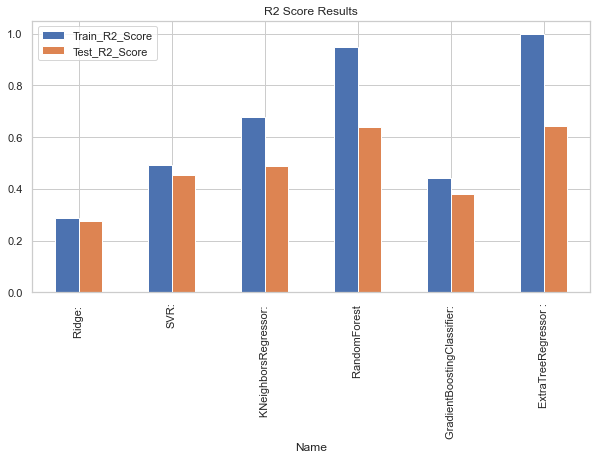

In [40]:
#bar graph to visualize the train r2 score and test r2 score obtained by various models
model_df.plot(x="Name", y=['Train_R2_Score' , 'Test_R2_Score'], kind="bar" , title = 'R2 Score Results' , figsize= (10,5))

In [41]:
from sklearn.model_selection import GridSearchCV
param_grid = [{
              'max_depth': [80, 150, 200,250],
              'n_estimators' : [100,150,200,250],
              'max_features': ["auto", "sqrt", "log2"]
            }]
reg = ExtraTreesRegressor(random_state=40)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = reg, param_grid = param_grid, cv = 5, n_jobs = -1 , scoring='r2' , verbose=2)
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=ExtraTreesRegressor(random_state=40), n_jobs=-1,
             param_grid=[{'max_depth': [80, 150, 200, 250],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'n_estimators': [100, 150, 200, 250]}],
             scoring='r2', verbose=2)

In [42]:
grid_search.best_params_

{'max_depth': 80, 'max_features': 'sqrt', 'n_estimators': 250}

In [43]:
grid_search.best_estimator_

ExtraTreesRegressor(max_depth=80, max_features='sqrt', n_estimators=250,
                    random_state=40)

In [44]:
grid_search.best_estimator_.score(X_train,Y_train)

1.0

In [45]:
# R2 score on test set with tuned parameters
grid_search.best_estimator_.score(X_test,Y_test)

0.6520955853451083

In [46]:
# RMSE score on test set with tuned parameters

np.sqrt(mean_squared_error(Y_test, grid_search.best_estimator_.predict(X_test)))

0.5960830847297314

Extra Tree Regressor after hyperparameter tuning gives r2 score of 0.65 and rsme score of 0.59